# Data Glacier Internship

Deliverable - Week 10

Nahari Terena - LISUM15

## Problem Statement

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

### Import Libraries

In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time

plt.style.use('fivethirtyeight')
sns.set(style='ticks')
warnings.filterwarnings("ignore")

### Import dataset

In [2]:
df = pd.read_csv('Healthcare_clean.csv', sep = ";")
df.tail()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,1,0,0,0,0,0,0,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,0,0,1,0,0,0,0,0,0,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
3423,P3424,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,1,0,0,0,0,0,0,1


In [3]:
df.shape

(3424, 65)

In [4]:
## Checking if there is any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 65 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [5]:
## Checking if there is any duplicated row
df.duplicated().sum()

0

## EDA 

### Questions

- How do risk factors relate to demographics?
- What are the most common risk factors?
- What’s the proportion of patients holding risk (and similar) factors that may affect treatment and diseases?


### Unidimensional analysis

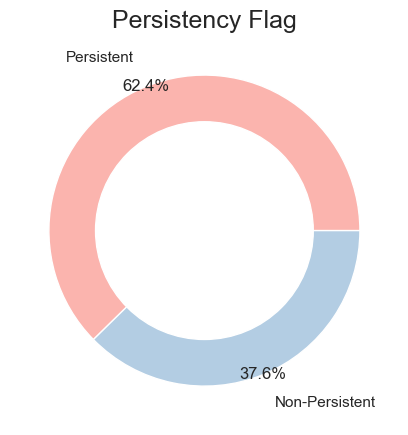

In [6]:
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Pastel1_7

## Persistency flag plot
my_circle = plt.Circle( (0,0), 0.7, color='white')
size = df['Persistency_Flag'].value_counts()
names = df['Persistency_Flag'].unique()

from palettable.colorbrewer.qualitative import Pastel1_7
plt.pie(size, labels=names, colors=Pastel1_7.hex_colors, autopct='%1.1f%%', pctdistance=1.0, labeldistance=1.2)
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.title("Persistency Flag", loc="center", fontsize=18)
plt.show()

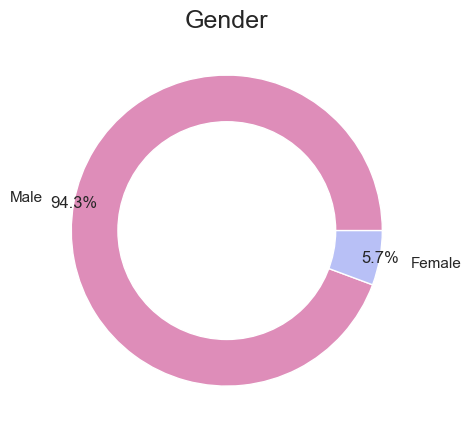

In [7]:
## Gender plot
import matplotlib.pyplot as plt
from palettable.wesanderson import Mendl_4

my_circle = plt.Circle( (0,0), 0.7, color='white')
size = df['Gender'].value_counts()
names = df['Gender'].unique()

from palettable.wesanderson import Mendl_4
plt.pie(size, labels=names, colors=Mendl_4.hex_colors, autopct='%1.1f%%', pctdistance=1.0, labeldistance=1.2)
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.title("Gender", loc="center", fontsize=18)
plt.show()

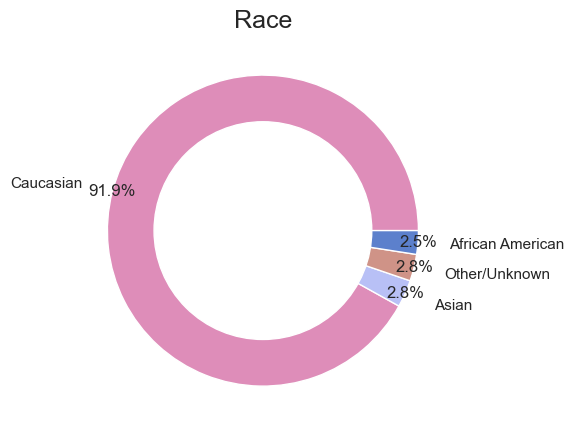

In [8]:
## Race plot
import matplotlib.pyplot as plt
from palettable.wesanderson import Mendl_4

my_circle = plt.Circle( (0,0), 0.7, color='white')
size = df['Race'].value_counts()
names = df['Race'].unique()

from palettable.wesanderson import Mendl_4
plt.pie(size, labels=names, colors=Mendl_4.hex_colors, autopct='%1.1f%%', pctdistance=1.0, labeldistance=1.2)
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.title("Race", loc="center", fontsize=18)
plt.show()

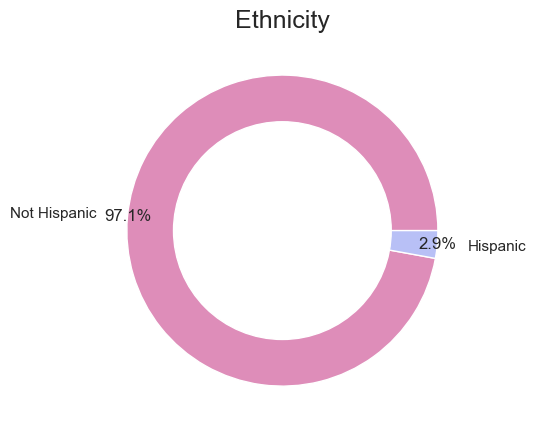

In [9]:
## Ethnicity plot
import matplotlib.pyplot as plt
from palettable.wesanderson import Mendl_4

my_circle = plt.Circle( (0,0), 0.7, color='white')
size = df['Ethnicity'].value_counts()
names = df['Ethnicity'].unique()

from palettable.wesanderson import Mendl_4
plt.pie(size, labels=names, colors=Mendl_4.hex_colors, autopct='%1.1f%%', pctdistance=1.0, labeldistance=1.2)
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.title("Ethnicity", loc="center", fontsize=18)
plt.show()

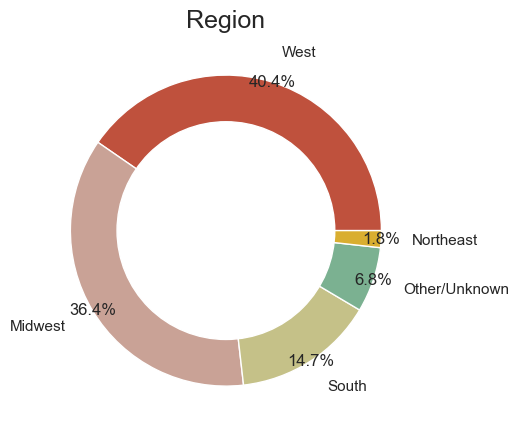

In [10]:
## Region plot
import matplotlib.pyplot as plt
from palettable.wesanderson import Moonrise6_5

my_circle = plt.Circle( (0,0), 0.7, color='white')
size = df['Region'].value_counts()
names = df['Region'].unique()

from palettable.wesanderson import Moonrise6_5
plt.pie(size, labels=names, colors=Moonrise6_5.hex_colors, autopct='%1.1f%%', pctdistance=1.0, labeldistance=1.2)
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.title("Region", loc="center", fontsize=18)
plt.show()

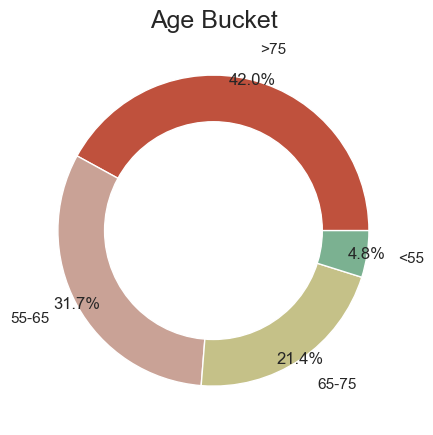

In [11]:
## Age plot
import matplotlib.pyplot as plt
from palettable.wesanderson import Moonrise6_5

my_circle = plt.Circle( (0,0), 0.7, color='white')
size = df['Age_Bucket'].value_counts()
names = df['Age_Bucket'].unique()

from palettable.wesanderson import Moonrise6_5
plt.pie(size, labels=names, colors=Moonrise6_5.hex_colors, autopct='%1.1f%%', pctdistance=1.0, labeldistance=1.2)
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.title("Age Bucket", loc="center", fontsize=18)
plt.show()

In [12]:
## Get summary statistics for the object and categorical columns
df.describe(include=[np.object, pd.Categorical]).T

,count,unique,top,freq
Ptid,3424,3424,P1,1
Persistency_Flag,3424,2,Non-Persistent,2135
Gender,3424,2,Female,3230
Race,3424,4,Caucasian,3148
Ethnicity,3424,2,Not Hispanic,3326
Region,3424,5,Midwest,1383
Age_Bucket,3424,4,>75,1439
Ntm_Speciality,3424,7,GENERAL PRACTITIONER,1845
Ntm_Specialist_Flag,3424,2,Others,2013
Ntm_Speciality_Bucket,3424,3,OB/GYN/Others/PCP/Unknown,2104


In [13]:
subset = df.iloc[:,20:]

subset.iloc[:,:-1].sum().sort_values(ascending=False) / subset.shape[0]

Injectable_Experience_During_Rx                                       0.892523
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias       0.515479
Risk_Vitamin_D_Insufficiency                                          0.477804
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms                0.447722
Comorb_Encounter_For_Immunization                                     0.441881
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx       0.394860
Concom_Narcotics                                                      0.360105
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations           0.345210
Comorb_Vitamin_D_Deficiency                                           0.319217
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified                  0.291764
Concom_Systemic_Corticosteroids_Plain                                 0.284171
Concom_Anti_Depressants_And_Mood_Stabilisers                          0.280082
Comorb_Osteoporosis_without_current_pathological_fra

Some highlights:

- The main comorbility factor is related to lipoproteins and metabolism (cholesterol).
- The main risk factor is deficiency in vitamin D.
- More than one third has been found to have taken narcotics.

In [14]:
## Patients holding one factor at least
subset.iloc[:,:-1][subset.sum(axis=1) >= 1].shape[0] / subset.shape[0]

0.9938668224299065

In [15]:
## demographics to risk (top10)

cols = [col for col in subset.iloc[:,:-1].columns]

df.groupby('Gender')[cols].sum().T.sort_values(by='Female', ascending=False).agg(
    {'Female': [lambda x: x / df[df.Gender == 'Female'].shape[0]],
     'Male': [lambda x: x / df[df.Gender == 'Male'].shape[0]]}).head(n=10)

Gender,Female,Male
,<lambda>,<lambda>
Injectable_Experience_During_Rx,0.891950,0.902062
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,0.517647,0.479381
Risk_Vitamin_D_Insufficiency,0.481734,0.412371
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,0.460991,0.226804
Comorb_Encounter_For_Immunization,0.441176,0.453608
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",0.388854,0.494845
Concom_Narcotics,0.359133,0.376289
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,0.344272,0.360825
Comorb_Vitamin_D_Deficiency,0.322910,0.257732


There are some significant differences between genders:

- Women seem to be more affected by vitamin D deficiencies.
- More than twice as many women as men have passed as screening for malignant neoplasms.
- Four times as many men as women suffer from Hypogonadism (untreated).

In [16]:
df.groupby('Age_Bucket')[cols].sum().T.head(n=10)

Age_Bucket,55-65,65-75,<55,>75
Injectable_Experience_During_Rx,656,965,150,1285
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,361,595,77,500
Comorb_Encounter_For_Immunization,257,517,46,693
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",304,447,50,551
Comorb_Vitamin_D_Deficiency,238,360,52,443
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,187,349,40,423
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,226,269,40,256
Comorb_Long_Term_Current_Drug_Therapy,160,254,29,374
Comorb_Dorsalgia,131,248,36,364
Comorb_Personal_History_Of_Other_Diseases_And_Conditions,128,216,32,301


In [17]:
df['Region'].value_counts()

Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64

In [18]:
df.groupby('Region')[cols].sum().T.agg(
    {'Midwest': [lambda x: x / 1383],
     'Northeast': [lambda x: x / 232],
    'Other/Unknown': [lambda x: x / 60],
    'South': [lambda x: x / 1247],
    'West': [lambda x: x / 502]}).head(n=10)

Region,Midwest,Northeast,Other/Unknown,South,West
,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>
Injectable_Experience_During_Rx,0.889371,0.969828,0.950000,0.866079,0.924303
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,0.449024,0.383621,0.516667,0.420209,0.533865
Comorb_Encounter_For_Immunization,0.422993,0.383621,0.633333,0.400160,0.601594
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",0.367317,0.331897,0.500000,0.368083,0.553785
Comorb_Vitamin_D_Deficiency,0.270427,0.301724,0.400000,0.392141,0.270916
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,0.279826,0.258621,0.266667,0.270249,0.396414
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,0.236443,0.284483,0.216667,0.166800,0.352590
Comorb_Long_Term_Current_Drug_Therapy,0.269704,0.193966,0.366667,0.211708,0.225100
Comorb_Dorsalgia,0.233550,0.215517,0.283333,0.174018,0.342629


There are some risks and other factors that seem to be significantly higher in South and West regions. It might be interesting to find out about socioeconomic factors aside.

In [19]:
df['Race'].value_counts()

Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64

In [20]:
df.groupby('Race')[cols].sum().T.agg(
    {'African American': [lambda x: x / 95],
     'Asian': [lambda x: x / 84],
    'Caucasian': [lambda x: x / 3148],
    'Other/Unknown': [lambda x: x / 97]}).head(n=10)

Race,African American,Asian,Caucasian,Other/Unknown
,<lambda>,<lambda>,<lambda>,<lambda>
Injectable_Experience_During_Rx,0.926316,0.880952,0.894854,0.793814
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,0.484211,0.464286,0.447268,0.412371
Comorb_Encounter_For_Immunization,0.421053,0.607143,0.438691,0.422680
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",0.336842,0.571429,0.391995,0.391753
Comorb_Vitamin_D_Deficiency,0.463158,0.297619,0.314485,0.350515
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,0.294737,0.380952,0.286531,0.381443
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,0.242105,0.309524,0.228717,0.226804
Comorb_Long_Term_Current_Drug_Therapy,0.210526,0.202381,0.240470,0.237113
Comorb_Dorsalgia,0.178947,0.261905,0.229034,0.195876


There seem to be some remarkable differences between Asian and other races. They are probably due to cultural factors and other behaviours, like medical reviews on a more regular basis (this is just a hypothesis to be found out).

In [21]:
pd.crosstab(df.Gluco_Record_During_Rx, df.Persistency_Flag, normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Gluco_Record_During_Rx,,
0,0.68517,0.31483
1,0.45122,0.54878


In [22]:
pd.crosstab(df.Gluco_Record_Prior_Ntm, df.Persistency_Flag, normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Gluco_Record_Prior_Ntm,,
0,0.621993,0.378007
1,0.628571,0.371429


Text(0, 0.5, 'Frequency')

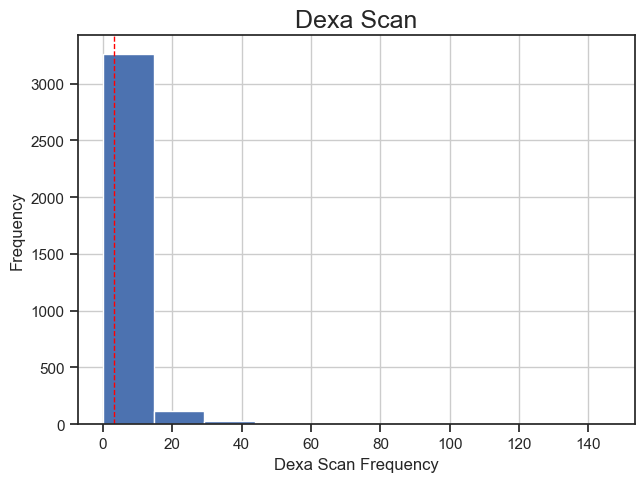

In [23]:
df.hist("Dexa_Freq_During_Rx")

plt.axvline(df.Dexa_Freq_During_Rx.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title("Dexa Scan", loc="center", fontsize=18)
plt.xlabel("Dexa Scan Frequency")
plt.ylabel("Frequency")


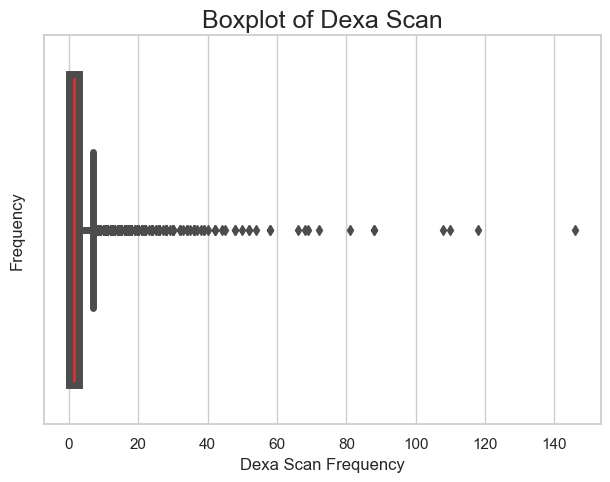

In [24]:
sns.set_style("whitegrid")

#Plotando o boxplot das espécies em relação ao tamanho das sépalas
ax = sns.boxplot( x ="Dexa_Freq_During_Rx",data = df,
                  linewidth=5, palette = "Set1", orient = "h")

# Adicionando Título ao gráfico
plt.title("Boxplot of Dexa Scan", loc="center", fontsize=18)
plt.xlabel("Dexa Scan Frequency")
plt.ylabel("Frequency")

plt.show()

In [25]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss
        
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "Dexa_Freq_During_Rx")
print(len(probable_outliers_tm))

272


In [26]:
print(len(possible_outliers_tm))

460


Text(0, 0.5, 'Frequency')

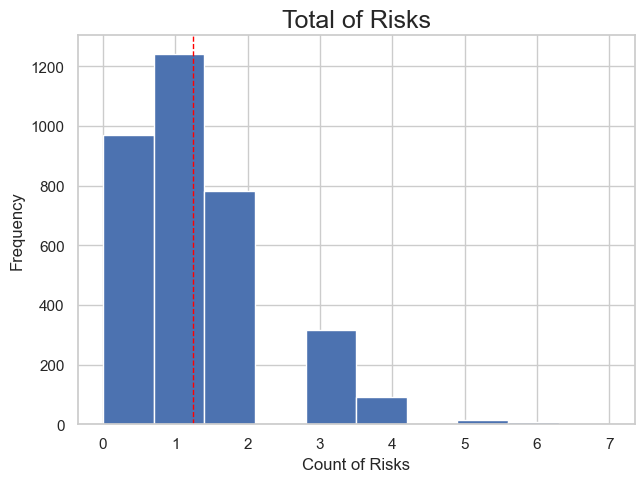

In [27]:
df.hist("Count_Of_Risks")

plt.axvline(df.Count_Of_Risks.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title("Total of Risks", loc="center", fontsize=18)
plt.xlabel("Count of Risks")
plt.ylabel("Frequency")

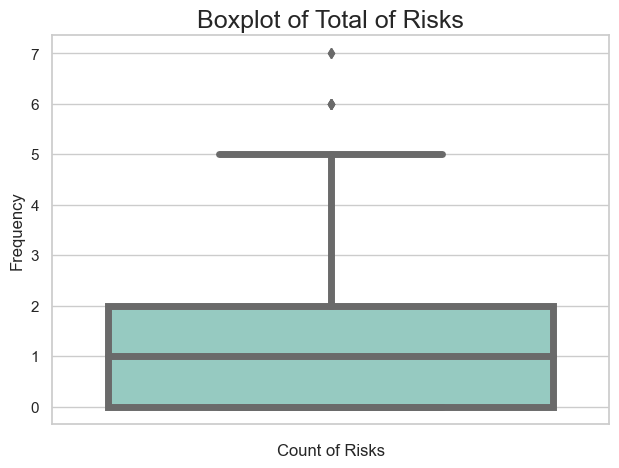

In [28]:
sns.set_style("whitegrid")

#Plotando o boxplot das espécies em relação ao tamanho das sépalas
ax = sns.boxplot( y ="Count_Of_Risks",data = df,
                  linewidth=5, palette = "Set3")

# Adicionando Título ao gráfico
plt.title("Boxplot of Total of Risks", loc="center", fontsize=18)
plt.xlabel("Count of Risks")
plt.ylabel("Frequency")

plt.show()

In [29]:
# function displays the % and # labeling for each piece of the pie

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

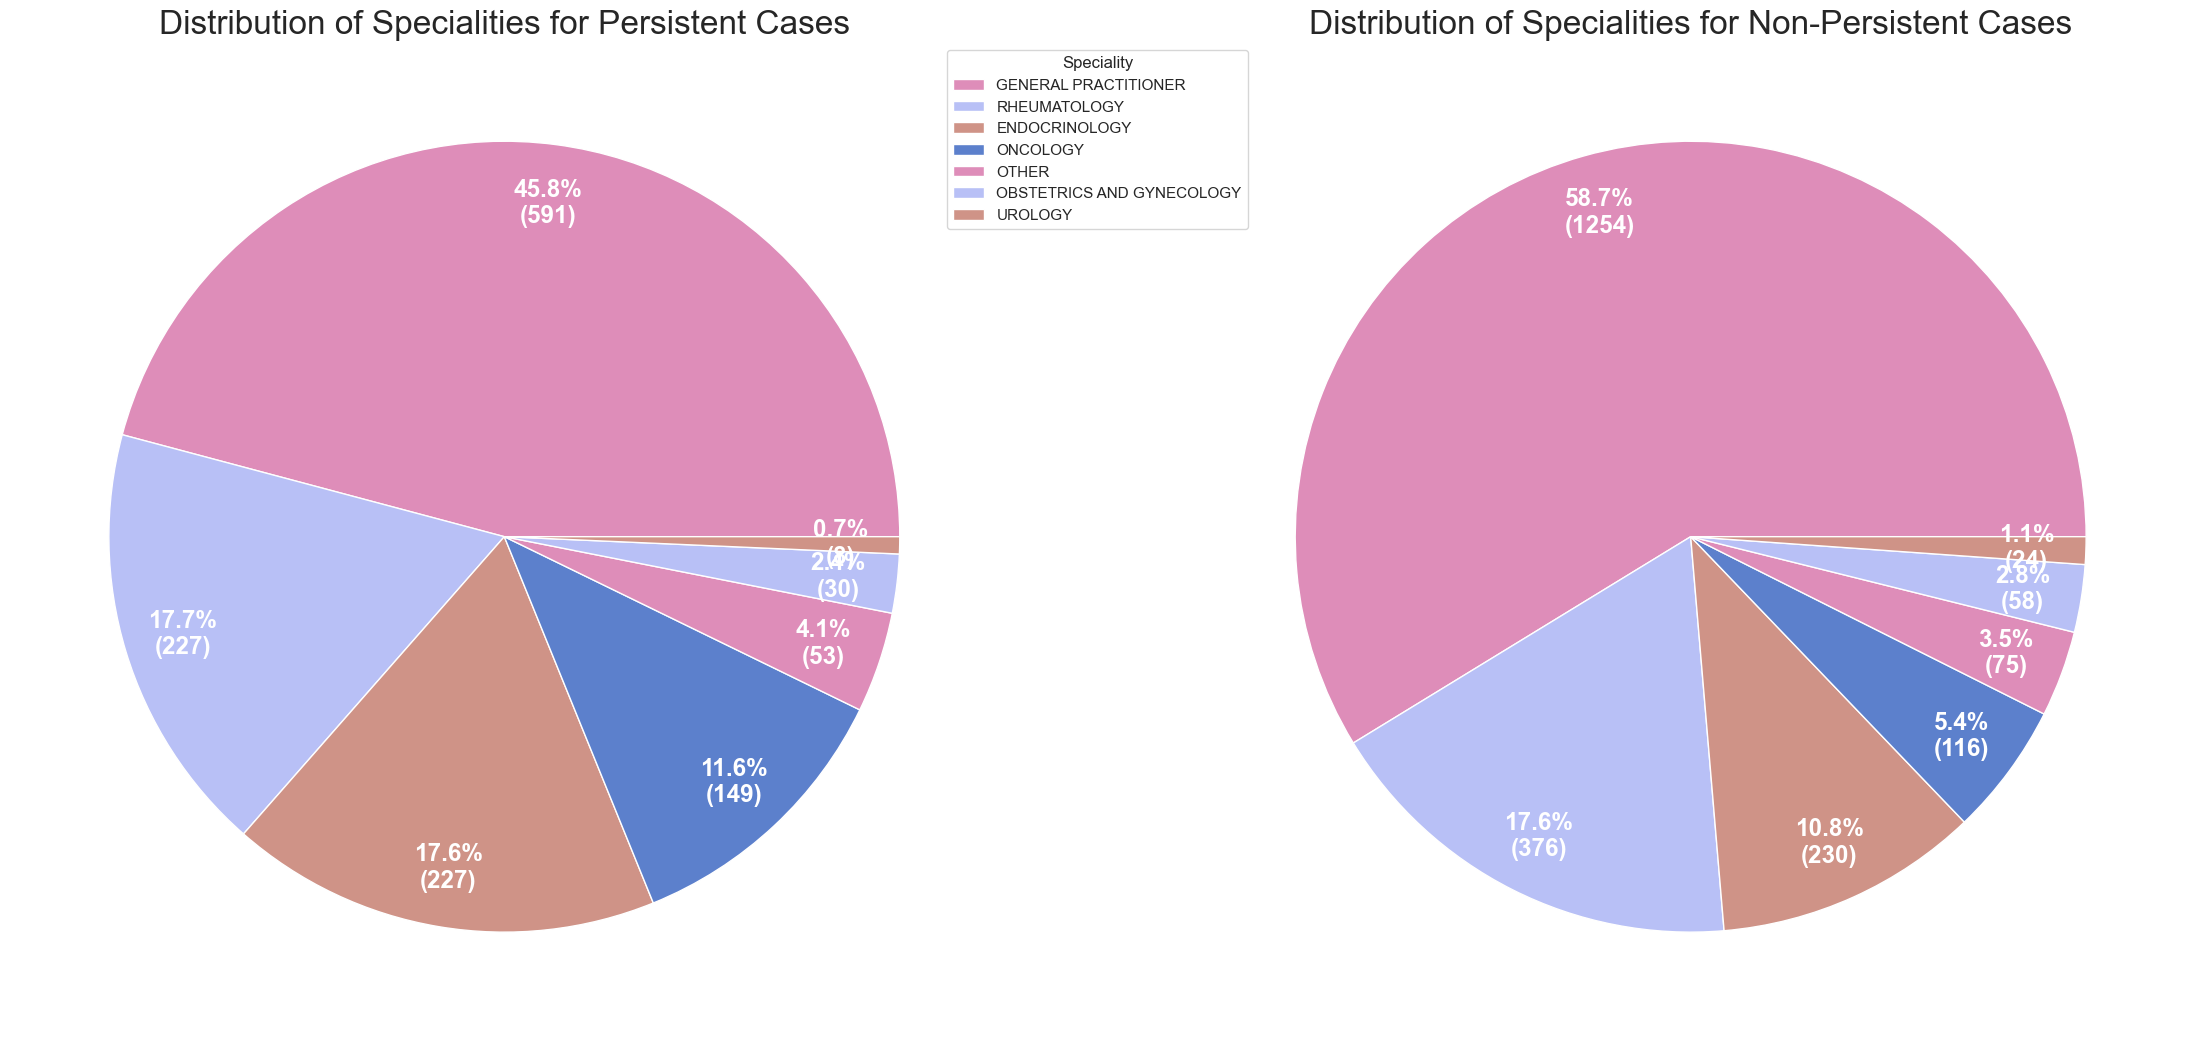

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (25,25), subplot_kw= dict(aspect= "equal"))

persistent_data = df[df.Persistency_Flag == "Persistent"]["Ntm_Speciality"]
non_persistent_data = df[df.Persistency_Flag == "Non-Persistent"]["Ntm_Speciality"]

per_spec = persistent_data.value_counts().values.tolist()
per_spec_label = persistent_data.value_counts().index.tolist()
non_per_spec = non_persistent_data.value_counts().values.tolist()
non_per_spec_label = non_persistent_data.value_counts().index.tolist()

wedges, texts, autotexts1 = ax1.pie(
    per_spec,
    autopct= lambda pct: func(pct, per_spec),
    textprops= dict(color= "w"),
    pctdistance=0.85,
    colors= Mendl_4.hex_colors
)

wedges, texts, autotexts2 = ax2.pie(
    non_per_spec,
    autopct= lambda pct: func(pct, non_per_spec),
    textprops= dict(color= "w"),
    pctdistance=0.85,
    colors= Mendl_4.hex_colors
)

ax1.legend(
    wedges,
    per_spec_label,
    title= "Speciality",
    loc= "upper center",
    bbox_to_anchor= (0.85, 0, 0.5, 1)
)

plt.setp(autotexts1, size= 17.5, weight= "bold")
plt.setp(autotexts2, size= 17.5, weight= "bold")


ax1.set_title("Distribution of Specialities for Persistent Cases", fontsize=24)
ax2.set_title("Distribution of Specialities for Non-Persistent Cases", fontsize=24)

plt.show()

60.31% of males are flagged as non-persistent.

62.48% of females are flagged as non-persistent.

Seems about the same, which tells us both genders are experiencing the results from the drug when it comes to the persistency.

In [31]:
# Distribution of the target variable by each variable analized will be shown

pd.crosstab(df.Ntm_Specialist_Flag, df.Persistency_Flag, normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Ntm_Specialist_Flag,,
Others,0.680079,0.319921
Specialist,0.542877,0.457123


In [32]:
pd.crosstab(df.Ntm_Speciality_Bucket, df.Persistency_Flag, normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Ntm_Speciality_Bucket,,
Endo/Onc/Uro,0.460894,0.539106
OB/GYN/Others/PCP/Unknown,0.679183,0.320817
Rheum,0.622517,0.377483
